# 文件操作

In [1]:
"""
测试目标
1. 访问模式对文件的影响
2. 访问模式对write()的影响
3. 访问模式是否可以省略
"""

# r: 如果文件不存在， 报错； 不支持写入操作， 表示只读
# f = open("test1.txt", "r")
# f = open("test.txt", "r")
# f.write("aa")
# f.close()

# w: 只写， 如果文件不存在，新建文件；执行写入，会覆盖原有内容
# f = open("1.text", "w")
# f.write("bbb")
# f.close()

# a:追加，如果文件不存在，新建文件；在原有内容基础上，追加新内容
# f = open("2.txt", "a")
# f.write("xyz")
# f.close()

# 访问模式参数可以省略，如果省略表示访问模式为r
# f = open("1.txt")
# f.close()

'\n测试目标\n1. 访问模式对文件的影响\n2. 访问模式对write()的影响\n3. 访问模式是否可以省略\n'

# read()
- 文件对象.read(num)
- num表示要从文件中读取的数据的长度(单位是字节)，如果没有传入num，那么就表示读取文件中所有的数据

In [12]:
f = open("test.txt", "r")

# 文件内容如果换行，底层有\n，会有字节占位，导致read书写参数读取出来的眼睛看到的个数和参数值不匹配
# read不写参数表示读取所有

print(f.read())
print("-" * 5)

f = open("test.txt", "r")
print(f.read())

f.close()

aaaaa
bbbbb
ccccc
ddddd
eeeee
-----
aaaaa
bbbbb
ccccc
ddddd
eeeee


## readlines()
- readlines可以按照行的方式把整个文件中的内容进行一次性读取，并且返回的是一个列表，其中每一行的数据为一个元素

In [13]:
f = open("test.txt", "r")

con = f.readlines()
print(con)

f.close()

['aaaaa\n', 'bbbbb\n', 'ccccc\n', 'ddddd\n', 'eeeee']


## readline()
- 一次读取一行内容

In [14]:
f = open("test.txt", "r")

con = f.readline()
print(con)

con = f.readline()
print(con)

con = f.readline()
print(con)

f.close()

aaaaa

bbbbb

ccccc



### 打开文件模式
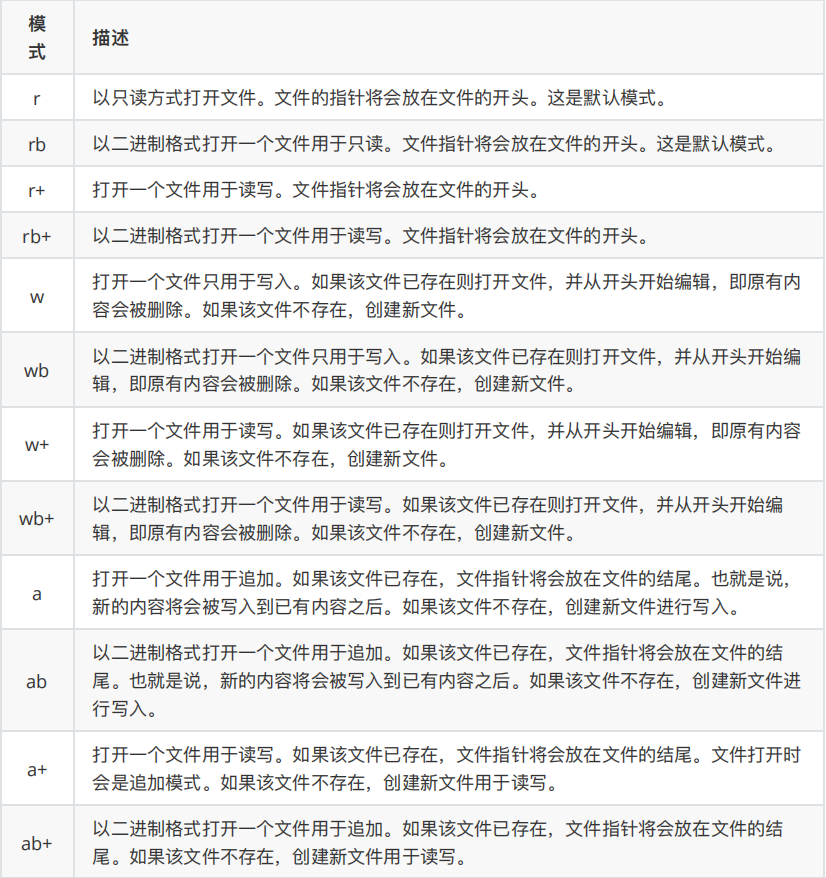

In [16]:
# r+: r没有该文件则报错， 文件指针在开头，所以能读取出来数据
f = open("test.txt", "r+")

con = f.read()
print(con)

f.close()

aaaaa
bbbbb
ccccc
ddddd
eeeee


In [17]:
# w+ : 没有改文件会新建文件， w特点:文件指针在开头，用新内容覆盖原内容
f = open("test.txt", "w+")

con = f.read()
print(con)

f.close()

In [18]:
# a+: 没有文件会新建文件，文件指针在结尾，无法读取数据（文件指针后面没有数据）
f = open("test.txt", "a+")

con = f.read()
print(con)

f.close()

### seek()函数
- 语法：文件对象.seek（偏移量, 起始位置） 0开头位置 1当前位置 2结尾位置

In [22]:
# r 改变文件指针位置：改变读取数据开始位置或把文件指针放结尾（无法读取数据）

f = open("test.txt", "r+")

f.seek(2, 0)

con = f.read()
print(con)
print("-" * 5)

f = open("test.txt", "r+")

f.seek(0, 2)

con = f.read()
print(con)

f.close()

aaa
bbbbb
ccccc
ddddd
eeeee
-----



In [23]:
# a 改变文件指针位置，做到可以读取出来数据

f = open("test.txt", "a+")

con = f.read()
print(con)
print("-" * 5)

f = open("test.txt", "a+")

f.seek(0, 0) # 等同于f.seek(0)
con = f.read()
print(con)

f.close()


-----
aaaaa
bbbbb
ccccc
ddddd
eeeee


## 文件备份

In [3]:
# 1. 用户输入目标文件  sound.txt.mp3
old_name = input("请输入您要备份的文件名：")
# print(old_name)
# print(type(old_name))

# 2. 规划备份文件的名字
# 2.1 提取后缀 -- 找到名字中的点 -- 名字和后缀分离 -- 最右侧的点才是后缀的点 -- 字符串查找某个字串rfind()
index = old_name.rfind(".")
# print(index)

# 4. 思考：有效文件才备份 .txt
if index > 0:
    # 提取后缀
    postfix = old_name[index:]

# 2.2 组织新名字 = 原名字 + [备份] + 后缀
# 原名字就是字符串中的一部分子串 -- 切片[开始:结束:步长]
# print(old_name[:index])
# print(old_name[index:])
new_name = old_name[:index] + "[备份]" + postfix
print(new_name)

# 3. 备份文件写入数据（数据和原文件一样）
# 3.1 打开原文件和备份文件
old_f = open(old_name, "rb")
new_f = open(new_name, "wb")

# 3.2 原文件读取，备份文件写入
# 如果不确定目标文件大小，循环读取写入，当读取出来的数据没有了终止循环
while True:
    con = old_f.read(1024)
    if len(con) == 0:
        # 表示读取完成了
        break
    new_f.write(con)

# 3.3 关闭文件
old_f.close()
new_f.close()

请输入您要备份的文件名： test.txt


test[备份].txt


In [6]:
# 文件备份
# 用户输入要备份的文件名
old_name = input("请输入要备份的文件名:")
index_num = old_name.rfind(".")

# 判断输入的名字是否合法
if index_num > 0:
    # 新名字
    new_name = old_name[:index_num] + "[备份]" + old_name[index_num:]

# 打开备份文件
old_f = open(old_name, "rb")
# 新建文件
new_f = open(new_name, "wb")

while True:
    con = old_f.read(1024)
    if len(con) == 0:
        break
    new_f.write(con)
    
# 关闭文件
new_f.close()
old_f.close()

请输入要备份的文件名: test1.txt


## 文件和文件夹操作
- 借助os模块相关功能

In [5]:
# rename() 重命名文件/文件夹
import os
os.rename("test.txt", "test1.txt")

In [7]:
# remove() 删除文件
import os
os.remove("test[备份].txt")

In [8]:
# mkdir() 创建文件夹
import os
os.mkdir("aa")

In [9]:
# rmdir() 删除文件夹
import os
os.rmdir("aa")

In [10]:
# getcwd() 获取当前目录
import os
print(os.getcwd())

C:\Users\DELL\Desktop\python\Python_heima


In [11]:
# chdir() 改变默认目录路径
import os
os.mkdir("aa")
os.chdir("aa")
os.mkdir("bb")

In [12]:
# listdir() 获取目录列表
import os
print(os.listdir())

['bb']


In [13]:
# rename() 重命名文件夹
import os
os.mkdir("aa")
os.rename("aa", "heimadownload")

### 批量重命名

In [ ]:
# 需求1. 把code文件夹所有文件重命名 Python_xxxx
# 需求2. 删除Python_ 重命名：1. 构造条件数据 2. 书写if
import os

# 构造条件数据
flag = 2

# 1. 找到所有文件，获取code文件夹的目录列表 -- listdir()
file_name = os.listdir()
print(file_name)

# 2. 构造名字
for i in file_name:
    if flag == 1:
        # new_name = "Python_" + 原文件i
        new_name = "Python_" + i
    elif flag == 2:
        # 删除前缀
        num = len("Python_")
        new_name = i[num:]

# 3. 重命名
    os.rename(i, new_name)
print(os.listdir())

In [ ]:
import os

# 构造条件数据
flag = 1

# 获取当前文件夹文件名列表
file_list = os.listdir()
print(file_list)

for i in file_list:
    if flag == 1:
        # 条件成立，添加前缀
        new_name = "python_" + i
    elif flag == 2:
        条件成立删除前缀
        num = len("python_")
        new_name = i[num:]
        
    # 重命名
    os.rename(i, new_name)
print(os.listdir())

In [21]:
# 按照要求写代码：
# 使用os模块创建一个名为“itcast”的文件夹
# 获取黑马文件夹当前所在目录
# 获取当前的目录列表
# 改变文件的操作路径
# 将itcast文件夹删除
import os

# 创建"itcast"文件夹
os.mkdir("itcast")

# 获取"itcast"当前所在目录
print(os.getcwd())

# 获取当前目录列表
os.listdir()

# 改变文件操作路径
os.chdir("itcast")
print(os.getcwd())
os.chdir("C:\\Users\\DELL\\Desktop\\python\\python_heima\\第一阶段\\第一阶段学习笔记")
print(os.getcwd())


# 删除"itcast"
os.rmdir("itcast")

C:\Users\DELL\Desktop\python\python_heima\第一阶段\第一阶段学习笔记
C:\Users\DELL\Desktop\python\python_heima\第一阶段\第一阶段学习笔记\itcast
C:\Users\DELL\Desktop\python\python_heima\第一阶段\第一阶段学习笔记


In [30]:
# 编写代码，完成以下操作
# 创建一个新项目中新创建一个名字py文件夹
# 进入py文件夹中创建5个文件，文件名分别为python-1.txt，python-2.txt，python-3.txt，
# 然后将py文件夹中的所有文件都改名为[itcast]python-1.txt，[itcast]python-2.txt，[itcast]python-3.txt，
import os

# 新建py文件夹
os.mkdir("py")

# 进入py文件夹
os.chdir("py")

# 创建5个文件
for i in range(1, 6):
    f = open(f"python-{i}.txt", "w")
    f.close()
    
# 获取py中的文件列表
file_list = os.listdir()
print(file_list)
for j in file_list:
    new_name = "[itcast]" + j
    os.rename(j, new_name)
print(os.listdir())

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'py'

In [3]:
# 按照说明完成代码：
# 在python用户目录下手动创建python01文件夹
# 在文件夹中手动创建gailun.txt文件
# 打开文件在gailun.txt中写入"德玛西亚！人在塔在！"
# 将输入的数据格式化输出到终端上
# 在文件夹中创建gailun副本.txt文件
# 将gailun.txt文件中的数据写入gailun副本.txt文件中
import os

# 修改路径进入python01文件夹中
os.chdir("C:\\Users\\DELL\\Desktop\\python\\python_heima\\第一阶段学习笔记\\python01")

# 打开文件
f_old = open("gailun.txt", "r", encoding="utf-8")
# 新建副本文件
f_new = open("gailun副本.txt", "w", encoding="utf")
# 读取内容
con = f_old.read()
print(con)
# 将内容写入副本文件中
f_new.write(con)

# 关闭文件
f_new.close()
f_old.close()

德玛西亚！人在塔在！


In [33]:
os.getcwd()

'C:\\Users\\DELL\\Desktop\\python\\python_heima\\第一阶段\\第一阶段学习笔记\\python01'